In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle

In [6]:
FILE_PATH = 'sonnets1.txt'
NUM_BATCHES = 16
LSTM_UNITS = 128
EMBEDDING_DIM = 100

In [9]:
# Read the data
with open(FILE_PATH) as f:
    data = f.read()



FileNotFoundError: [Errno 2] No such file or directory: 'sonnets1.txt'

In [12]:
# Read the data
with open("/content/sonnets1.txt.txt") as f:
    data = f.read()

# Convert to lower case and save as a list
corpus = data.lower().split("\n")

print(f"There are {len(corpus)} lines of sonnets\n")
print(f"The first 5 lines look like this:\n")
for i in range(5):
  print(corpus[i])


There are 2465 lines of sonnets

The first 5 lines look like this:

from fairest creatures we desire increase,
that thereby beauty's rose might never die,
but as the riper should by time decease,
his tender heir might bear his memory:
but thou contracted to thine own bright eyes,


In [14]:

def fit_vectorizer(corpus):
    """
    Instantiates the vectorizer class on the corpus

    Args:
        corpus (list): List with the sentences.

    Returns:
        (tf.keras.layers.TextVectorization): an instance of the TextVectorization class containing the word-index dictionary, adapted to the corpus sentences.
    """

    tf.keras.utils.set_random_seed(65) # Do not change this line or you may have different expected outputs throughout the assignment

    ### START CODE HERE ###

     # Define the object with appropriate parameters
    vectorizer = tf.keras.layers.TextVectorization(
        standardize='lower_and_strip_punctuation',  # Convert to lowercase and strip punctuation
        split='whitespace',  # Split on whitespace (default)
        ragged=True,  # Allow ragged tensors
        output_mode='int'  # Output as integers
    )

    # Adapt it to the corpus
    vectorizer.adapt(corpus)
    ### END CODE HERE ###

    return vectorizer

In [15]:
vectorizer = fit_vectorizer(corpus)
total_words = len(vectorizer.get_vocabulary())
print('Name:  souvik kundu               Register Number: 212221230105                ')
print(f"Total number of words in corpus (including the out of vocabulary): {total_words}")

Name:                 Register Number:                 
Total number of words in corpus (including the out of vocabulary): 3180


In [16]:
vectorizer = fit_vectorizer(corpus)
total_words = len(vectorizer.get_vocabulary())
print('Name: Souvik kundu    Register Number: 212221230105')
print(f"Total number of words in corpus (including the out of vocabulary): {total_words}")

Name: Souvik kundu    Register Number: 212221230105
Total number of words in corpus (including the out of vocabulary): 3180


In [17]:
print('Name: Souvik Kundu   Register Number: 212221230105')
print(f"Passing a string directly: {vectorizer('This is a test string').__repr__()}")
print(f"Passing a list of strings: {vectorizer(['This is a test string'])}")

Name: Souvik Kundu   Register Number: 212221230105
Passing a string directly: <tf.Tensor: shape=(5,), dtype=int64, numpy=array([  30,   14,   18,    1, 1688])>
Passing a list of strings: <tf.RaggedTensor [[30, 14, 18, 1, 1688]]>


In [4]:
# GRADED FUNCTION: n_gram_seqs

def n_gram_seqs(corpus, vectorizer):
    """
    Generates a list of n-gram sequences

    Args:
        corpus (list of string): lines of texts to generate n-grams for
        vectorizer (tf.keras.layers.TextVectorization): an instance of the TextVectorization class adapted in the corpus

    Returns:
        (list of tf.int64 tensors): the n-gram sequences for each line in the corpus
    """
    input_sequences = []

    ### START CODE HERE ###
    for sentence in corpus:
        # Vectorize the sentence to get the token indices
        vectorized_sentence = vectorizer(sentence)

        # Generate n-grams for the vectorized sentence
        for i in range(2, vectorized_sentence.shape[0] + 1):  # Start from 2 to avoid the first token
            n_gram = vectorized_sentence[:i]
            input_sequences.append(n_gram)

    ### END CODE HERE ###

    return input_sequences



In [22]:
# Apply the n_gram_seqs transformation to the whole corpus
input_sequences = n_gram_seqs(corpus, vectorizer)

# Save max length
max_sequence_len = max([len(x) for x in input_sequences])
print('Name: souvik kundu     Register Number: 212221230105')
print(f"n_grams of input_sequences have length: {len(input_sequences)}")
print(f"maximum length of sequences is: {max_sequence_len}")

NameError: name 'vectorizer' is not defined

In [23]:
# Previous cell where you defined fit_vectorizer and initialized vectorizer
from tensorflow.keras.layers import TextVectorization

def fit_vectorizer(corpus):
    # Define the vocabulary size
    vocab_size = 10000

    # Create a TextVectorization layer
    vectorizer = TextVectorization(max_tokens=vocab_size, output_sequence_length=20)

    # Adapt the layer to the corpus
    vectorizer.adapt(corpus)

    return vectorizer

vectorizer = fit_vectorizer(corpus)  # Assuming corpus is defined somewhere

# ... other code ...

# Current cell ipython-input-22-e3f35abb912f
# Apply the n_gram_seqs transformation to the whole corpus

# Import necessary function
from __main__ import n_gram_seqs  # Importing n_gram_seqs from the main scope

input_sequences = n_gram_seqs(corpus, vectorizer)

# Save max length
max_sequence_len = max([len(x) for x in input_sequences])
print('Name: souvik kundu     Register Number: 212221230105')
print(f"n_grams of input_sequences have length: {len(input_sequences)}")
print(f"maximum length of sequences is: {max_sequence_len}")

Name: souvik kundu     Register Number: 212221230105
n_grams of input_sequences have length: 76
maximum length of sequences is: 20


In [42]:

def fit_vectorizer(corpus):
    """
    Instantiates the vectorizer class on the corpus

    Args:
        corpus (list): List with the sentences.

    Returns:
        (tf.keras.layers.TextVectorization): an instance of the TextVectorization class containing the word-index dictionary, adapted to the corpus sentences.
    """

    tf.keras.utils.set_random_seed(65) # Do not change this line or you may have different expected outputs throughout the assignment

    ### START CODE HERE ###

     # Define the object with appropriate parameters
    vectorizer = tf.keras.layers.TextVectorization(
        standardize='lower_and_strip_punctuation',  # Convert to lowercase and strip punctuation
        split='whitespace',  # Split on whitespace (default)
        ragged=True,  # Allow ragged tensors
        output_mode='int'  # Output as integers
    )

    # Adapt it to the corpus
    vectorizer.adapt(corpus)
    ### END CODE HERE ###

    return vectorizer

In [44]:
vectorizer = fit_vectorizer(corpus)
total_words = len(vectorizer.get_vocabulary())
print('Name: souvik kundu     Register Number: 212221230105')
print(f"Total number of words in corpus (including the out of vocabulary): {total_words}")

Name: souvik kundu     Register Number: 212221230105
Total number of words in corpus (including the out of vocabulary): 11


In [45]:
print('Name: souvik kundu     Register Number: 212221230105')
print(f"Passing a string directly: {vectorizer('This is a test string').__repr__()}")
print(f"Passing a list of strings: {vectorizer(['This is a test string'])}")


Name: souvik kundu     Register Number: 212221230105
Passing a string directly: <tf.Tensor: shape=(5,), dtype=int64, numpy=array([2, 4, 1, 1, 1])>
Passing a list of strings: <tf.RaggedTensor [[2, 4, 1, 1, 1]]>


In [46]:
# GRADED FUNCTION: n_gram_seqs

def n_gram_seqs(corpus, vectorizer):
    """
    Generates a list of n-gram sequences

    Args:
        corpus (list of string): lines of texts to generate n-grams for
        vectorizer (tf.keras.layers.TextVectorization): an instance of the TextVectorization class adapted in the corpus

    Returns:
        (list of tf.int64 tensors): the n-gram sequences for each line in the corpus
    """
    input_sequences = []

    ### START CODE HERE ###
    for sentence in corpus:
        # Vectorize the sentence to get the token indices
        vectorized_sentence = vectorizer(sentence)

        # Generate n-grams for the vectorized sentence
        for i in range(2, vectorized_sentence.shape[0] + 1):  # Start from 2 to avoid the first token
            n_gram = vectorized_sentence[:i]
            input_sequences.append(n_gram)

    ### END CODE HERE ###

    return input_sequences


In [47]:
# Apply the n_gram_seqs transformation to the whole corpus
input_sequences = n_gram_seqs(corpus, vectorizer)

# Save max length
max_sequence_len = max([len(x) for x in input_sequences])
print('Name: souvik kundu    Register Number: 212221230105')
print(f"n_grams of input_sequences have length: {len(input_sequences)}")
print(f"maximum length of sequences is: {max_sequence_len}")

Name: souvik kundu    Register Number: 212221230105
n_grams of input_sequences have length: 18
maximum length of sequences is: 6


In [48]:
# GRADED FUNCTION: pad_seqs

def pad_seqs(input_sequences, max_sequence_len):
    """
    Pads tokenized sequences to the same length

    Args:
        input_sequences (list of int): tokenized sequences to pad
        maxlen (int): maximum length of the token sequences

    Returns:
        (np.array of int32): tokenized sequences padded to the same length
    """

   ### START CODE HERE ###
    # Convert tensors to lists if necessary
    input_list = [seq if isinstance(seq, list) else seq.numpy().tolist() for seq in input_sequences]

    # Use pad_sequences to pad the sequences with left padding ('pre')
    padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(
        input_list,              # Use the list of lists for padding
        maxlen=max_sequence_len,  # Set the maximum length
        padding='pre',            # Pad sequences to the left (before the sequence)
        dtype='int32'             # Specify the output type as int32
    )
    ### END CODE HERE ###

    return padded_sequences

In [49]:
# Pad the whole corpus
input_sequences = pad_seqs(input_sequences, max_sequence_len)
print('Name: souvik kundu   Register Number: 212221230105')
print(f"padded corpus has shape: {input_sequences.shape}")

Name: souvik kundu   Register Number: 212221230105
padded corpus has shape: (18, 6)


In [51]:
# GRADED FUNCTION: features_and_labels

def features_and_labels_dataset(input_sequences, total_words):
    """
    Generates features and labels from n-grams and returns a tensorflow dataset

    Args:
        input_sequences (list of int): sequences to split features and labels from
        total_words (int): vocabulary size

    Returns:
        (tf.data.Dataset): Dataset with elements in the form (sentence, label)
    """
    ### START CODE HERE ###
    # Define the features by taking all tokens except the last one for each sequence
    features = [seq[:-1] for seq in input_sequences]

    # Define the labels by taking the last token for each sequence
    labels = [seq[-1] for seq in input_sequences]

    # One-hot encode the labels using total_words as the number of classes
    one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

    # Build the dataset using the features and one-hot encoded labels
    dataset = tf.data.Dataset.from_tensor_slices((features, one_hot_labels))

    # Batch the dataset with a batch size of 16
    batch_size = 16  # Feel free to adjust this based on the global variable, but should be <= 64
    batched_dataset = dataset.batch(batch_size)

    ### END CODE HERE ###

    return batched_dataset


# Split the whole corpus
dataset = features_and_labels_dataset(input_sequences, total_words).prefetch(tf.data.AUTOTUNE)
print('Name: souvik kundu   Register Number: 212221230105')
print(f"Feature shape: {dataset.element_spec[0]}")
print(f"Label shape: {dataset.element_spec[1]}")

Name: souvik kundu   Register Number: 212221230105
Feature shape: TensorSpec(shape=(None, 5), dtype=tf.int32, name=None)
Label shape: TensorSpec(shape=(None, 11), dtype=tf.float64, name=None)


In [52]:
# GRADED FUNCTION: create_model

def create_model(total_words, max_sequence_len):
    """
    Creates a text generator model

    Args:
        total_words (int): size of the vocabulary for the Embedding layer input
        max_sequence_len (int): length of the input sequences

    Returns:
       (tf.keras Model): the text generator model
    """
    model = tf.keras.Sequential()

   ### START CODE HERE ###
    # Input layer shape is max_sequence_len - 1 because we removed the last word as a label
    model.add(tf.keras.layers.Input(shape=(max_sequence_len - 1,)))

    # Embedding layer
    model.add(tf.keras.layers.Embedding(input_dim=total_words,
                                        output_dim=100,
                                        input_length=max_sequence_len - 1))

    # Add a Bidirectional LSTM layer with 150 units
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)))

    # Add a Dense layer with 'total_words' units and softmax activation
    model.add(tf.keras.layers.Dense(total_words, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    ### END CODE HERE ###

    return model


In [53]:
model = create_model(total_words, max_sequence_len)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [54]:
example_batch = dataset.take(1)

try:
	model.evaluate(example_batch, verbose=False)
except:
	print("Your model is not compatible with the dataset you defined earlier. Check that the loss function and last layer are compatible with one another.")
else:
	predictions = model.predict(example_batch, verbose=False)
	print(f"predictions have shape: {predictions.shape}")

predictions have shape: (16, 11)


In [56]:
history = model.fit(dataset, epochs=30, verbose=1)


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2106 - loss: 2.3947
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3843 - loss: 2.3644
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3264 - loss: 2.3389
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2106 - loss: 2.3105
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2106 - loss: 2.2768
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2106 - loss: 2.2361
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2106 - loss: 2.1869
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2106 - loss: 2.1298
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2106 - loss: 2.0697
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2106 - loss: 2.0207
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2106 - loss: 2.0071
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2106 - loss: 2.0421
E

Name: souvik kundu   Register Number: 212221230105


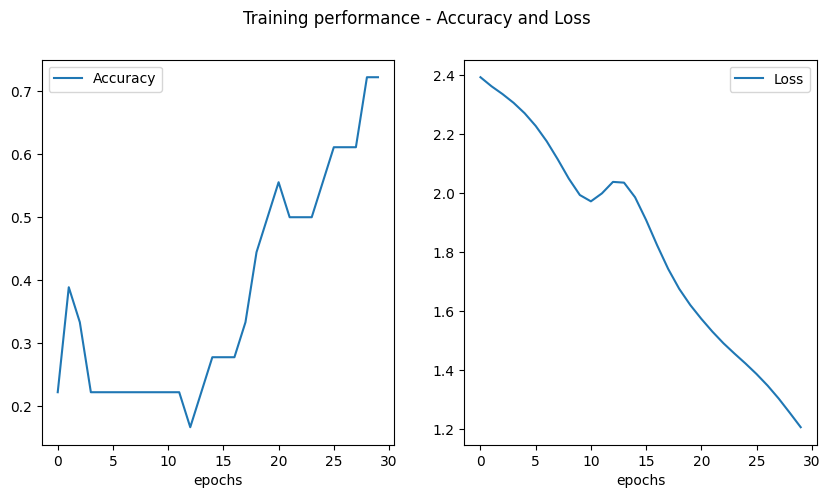

In [60]:
!pip install matplotlib

import matplotlib.pyplot as plt  # Import the pyplot module

# Get training and validation accuracies
acc = history.history['accuracy']
loss = history.history['loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5)) # Now plt is recognized
fig.suptitle('Training performance - Accuracy and Loss')
print('Name: souvik kundu   Register Number: 212221230105')

for i, (data, label) in enumerate(zip([acc,loss], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data, label=label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')